# Project: Investigate TMDB movie data

## Introduction
> This data analyst process will be focus on change of movie from 1960 to current,to found out describe which type of movie is being most popular and can get more revenue.
And how is the budget limit affect the movie quality.

# Data Wrangling

In [19]:
# Import numpy, pandas & matplotlib
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
% matplotlib inline
plt.style.use('seaborn')
# Import csv file
df = pd.read_csv('tmdb-movies.csv')

>Before get start, take a look at the data first.

In [20]:
df.head(1)

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,...,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.500000,2015,137999939.280026,1392445892.523800


In [21]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 21 columns):
id                      10866 non-null int64
imdb_id                 10856 non-null object
popularity              10866 non-null float64
budget                  10866 non-null int64
revenue                 10866 non-null int64
original_title          10866 non-null object
cast                    10790 non-null object
homepage                2936 non-null object
director                10822 non-null object
tagline                 8042 non-null object
keywords                9373 non-null object
overview                10862 non-null object
runtime                 10866 non-null int64
genres                  10843 non-null object
production_companies    9836 non-null object
release_date            10866 non-null object
vote_count              10866 non-null int64
vote_average            10866 non-null float64
release_year            10866 non-null int64
budget_adj              1

# Data cleaning

> After look at the data frame, there some problem need to be fix, including missing value, or some column have no use on data analyst.

In [22]:
# Check if any duplicated row first, and delete duplicated value
df.duplicated()
df.drop_duplicates(inplace=True)

### Drop useless columns
>There some columns that cannot use for data analyst, should be remove from the data frame.

In [23]:
# Drop useless columns
df.drop(['homepage','tagline','overview','imdb_id'], axis=1, inplace=True)

In [24]:
# Drop NA value
df = df.dropna(subset=['genres','cast','director','keywords','production_companies'])

>Integer column will display exact value format, might not have enough space to display.
 This code can make sure number will display as normal intger view.


In [25]:
pd.set_option('float_format', '{:f}'.format) # show all number 
df.describe()

,id,popularity,budget,revenue,runtime,vote_count,vote_average,release_year,budget_adj,revenue_adj
count,8666.000000,8666.000000,8666.000000,8666.000000,8666.000000,8666.000000,8666.000000,8666.000000,8666.000000,8666.000000
mean,57003.179206,0.741937,17709374.600277,49248634.448419,103.815140,264.204823,6.003612,2000.129818,21307490.965568,63624403.824572
std,86242.565745,1.087657,33573621.883628,128952938.076386,26.207186,635.195808,0.893539,13.221278,37102690.204355,159287366.708963
min,5.000000,0.000188,0.000000,0.000000,0.000000,10.000000,1.500000,1960.000000,0.000000,0.000000
25%,9816.750000,0.249990,0.000000,0.000000,91.000000,20.000000,5.500000,1993.000000,0.000000,0.000000
50%,16216.500000,0.449377,1500000.000000,179382.000000,100.000000,54.000000,6.100000,2004.000000,2130702.681378,189123.749136
75%,54003.000000,0.842984,21000000.000000,38902688.750000,113.000000,200.000000,6.600000,2011.000000,28104657.571918,55248572.506101
max,417859.000000,32.985763,425000000.000000,2781505847.000000,705.000000,9767.000000,8.700000,2015.000000,425000000.000000,2827123750.411890


>Use a new column century to group all value might better to see the describe the change on different period.
>Therefore, I reated a new column called 'release_century'.
Every 10 years will be group into one century

In [26]:
year =[1959, 1970, 1980, 1990, 2000, 2010,2020]
century =[1960, 1970, 1980, 1990, 2000, 2010]
df['release_century'] = pd.cut(df['release_year'], year, labels = century)

In [27]:
# Change format of 'release_year' to string format
df['release_year'] = df['release_year'].astype(str)

### Split data if multiple data stored in one row
>Some row in column 'cast','keywords','genres','production_companies' and 'director' is stored multiple data in one row, and separate with '|'.
> 'genres' will be use in this data analyst, so I need to split to different row.

>First, I need to calculate how many value to split in each rows, because every rows have different counts of cast, director, genres, etc.
I created a for loop to do it.

In [28]:
split_cols = ['cast','keywords','genres','production_companies'] # Columns need to be split
new_split_cols = ['cast_split','keywords_split','genres_split','companies_split'] # Create new columns to count split

# Count how many time need to be split for each column, and create a new column to store the count
c = 0
for split in split_cols:
    print(split_cols[c], new_split_cols[c])
    df[new_split_cols[c]] = df[split_cols[c]].str.count('\|') # | count
    df[new_split_cols[c]].fillna(0.0, inplace=True) # fill na if no |
    df[new_split_cols[c]] = df[new_split_cols[c]].astype(int) # change format to integer
    c += 1

cast cast_split
keywords keywords_split
genres genres_split
production_companies companies_split


>Copied a new data frame, and base on the maximun number of genres in one row, created enough columns to store it.

In [29]:
df_bygenres = df.copy()
hb_genres = df_bygenres.query('genres_split > 0')
hb_genres['genres_split'].value_counts()
new_genres = pd.DataFrame().reindex_like(hb_genres) # copy dataframe with no rows
for count in range(df['genres_split'].max()): # According maximun num of count, created columns and gave different name
    num = count + 1
    df_genresname = 'hb_genres' + str(num)
    vars()[df_genresname] = df.copy()
    vars()[df_genresname] = vars()[df_genresname].query('genres_split == ' + str(num))
    for count in range(vars()[df_genresname]['genres_split'].max() + 1):
        name = count + 1
        col_name = "genres" + str(name) # Auto generate new column name
        vars()[col_name] = vars()[df_genresname].copy()
        vars()[col_name]['genres'] = vars()[col_name]['genres'].apply(lambda x: x.split("|")[count]) # Put split value into different columns
        new_genres = new_genres.append(vars()[col_name]) # Create new column for next loop
df_bygenres.drop(hb_genres.index, inplace=True) # Match with original dataframe, and drop value which can be found on both dataframe
df_bygenres = df_bygenres.append(new_genres, ignore_index=True) # Combine 2 dataframes together
df_bygenres.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29102 entries, 0 to 29101
Data columns (total 22 columns):
id                      22105 non-null float64
popularity              22105 non-null float64
budget                  22105 non-null float64
revenue                 22105 non-null float64
original_title          22105 non-null object
cast                    22105 non-null object
director                22105 non-null object
keywords                22105 non-null object
runtime                 22105 non-null float64
genres                  22105 non-null object
production_companies    22105 non-null object
release_date            22105 non-null object
vote_count              22105 non-null float64
vote_average            22105 non-null float64
release_year            22105 non-null object
budget_adj              22105 non-null float64
revenue_adj             22105 non-null float64
release_century         22105 non-null object
cast_split              22105 non-null float64
keyword

## Fill zero value 
'Budget','revenue','runtime' have some zero values, But for more precisely to show the different between period, I planned to create a for loop to generate mean value base on every century

In [30]:
df_bygenres_empty = pd.DataFrame(data=None, columns=df_bygenres.columns, index=df_bygenres.index) # create empty dataframe
null_cols = ['budget','revenue','runtime']
for year in century: # Separate dataframe to year
    df_name = 'df_' + str(year) 
    vars()[df_name] = df_bygenres[df_bygenres['release_century'] == year] # Every dataframe store value within the same period
    for cols in null_cols: # For loop for calculate mean of each columns
        df_no0meanname = str(cols) + '_mean'
        vars()[df_no0meanname] = df_bygenres[df_bygenres['release_century'] == year][df_bygenres[cols] > 0.000000] # exclude zero value before calculate
        mean_count = str(cols) + '_mean'
        vars()[mean_count] = vars()[df_no0meanname][cols].mean()
    print(year, cols, budget_mean, revenue_mean, runtime_mean)
    update_row = 'year_' + str(year) + '_row' # After loop 3 columns, create a dataframe to store update value
    vars()[update_row] = df_bygenres[df_bygenres['release_century'] == year]
    vars()[update_row]['budget'].replace(0.000000, budget_mean,inplace=True) # replace zero to update mean number
    vars()[update_row]['revenue'].replace(0.000000, revenue_mean,inplace=True)
    vars()[update_row]['runtime'].replace(0.000000, runtime_mean,inplace=True)
    



1960 runtime 6079726.347708895 42324121.366037734 117.30321910695743


/usr/local/conda3/envs/p36/lib/python3.6/site-packages/ipykernel_launcher.py:8: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  
/usr/local/conda3/envs/p36/lib/python3.6/site-packages/pandas/core/generic.py:5890: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._update_inplace(new_data)


1970 runtime 7449454.38172043 57633442.540037245 109.21552373775434
1980 runtime 15333276.121383203 56040039.06196841 104.91739626950894
1990 runtime 36196705.222709015 95213711.95519505 106.90581342947273
2000 runtime 43010576.72377049 117428728.94375142 103.18407193320488
2010 runtime 46482620.88180404 147459704.75873274 99.66902404526166


> The last action created multiple dataframe for each period, need to combine together as one dataframe

In [31]:
df_bygenres=year_1960_row.append([year_1970_row,year_1980_row,year_1990_row,year_2000_row,year_2010_row])
df_bygenres.describe()

,id,popularity,budget,revenue,runtime,vote_count,vote_average,budget_adj,revenue_adj,cast_split,keywords_split,genres_split,companies_split
count,22105.000000,22105.000000,22105.000000,22105.000000,22105.000000,22105.000000,22105.000000,22105.000000,22105.000000,22105.000000,22105.000000,22105.000000,22105.000000
mean,51118.019634,0.797723,35389515.904065,105556816.663799,104.324936,297.047682,5.990179,24887352.479951,73351774.707815,3.943995,3.112870,2.037458,1.419995
std,80925.082860,1.201959,33820686.063055,135765068.670386,26.761585,694.918272,0.877339,40755498.722644,175522844.368669,0.378500,1.331557,1.092927,1.353050
min,5.000000,0.000188,1.000000,2.000000,3.000000,10.000000,1.500000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,9614.000000,0.263897,12000000.000000,33800000.000000,92.000000,22.000000,5.500000,0.000000,0.000000,4.000000,2.000000,1.000000,0.000000
50%,14821.000000,0.471789,36196705.222709,95213711.955195,101.000000,60.000000,6.000000,4397462.347608,871854.783646,4.000000,4.000000,2.000000,1.000000
75%,44833.000000,0.900342,46482620.881804,117760134.000000,114.000000,231.000000,6.600000,34485282.256288,66061856.569856,4.000000,4.000000,3.000000,2.000000
max,417859.000000,32.985763,425000000.000000,2781505847.000000,705.000000,9767.000000,8.700000,425000000.000000,2827123750.411890,4.000000,4.000000,4.000000,4.000000


In [32]:
# Final info before start the Exploratory Data Analysis
df_bygenres.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 22105 entries, 1500 to 28828
Data columns (total 22 columns):
id                      22105 non-null float64
popularity              22105 non-null float64
budget                  22105 non-null float64
revenue                 22105 non-null float64
original_title          22105 non-null object
cast                    22105 non-null object
director                22105 non-null object
keywords                22105 non-null object
runtime                 22105 non-null float64
genres                  22105 non-null object
production_companies    22105 non-null object
release_date            22105 non-null object
vote_count              22105 non-null float64
vote_average            22105 non-null float64
release_year            22105 non-null object
budget_adj              22105 non-null float64
revenue_adj             22105 non-null float64
release_century         22105 non-null object
cast_split              22105 non-null float64
keyw

# Exploratory Data Analysis

In [33]:
# Define the matplotlib function first
plt.style.use('seaborn-darkgrid')

## Question 1: How is the change of the movie history
> First, Let's found out which type of movie have been release the most time

In [34]:
df_bygenres['genres'].value_counts().head(5)

Drama       3934
Comedy      3050
Thriller    2462
Action      2022
Romance     1415
Name: genres, dtype: int64

> Put it to the Pie chart, to see the compare with others genres easily

Text(0.5,1,'percentage of movie genres')

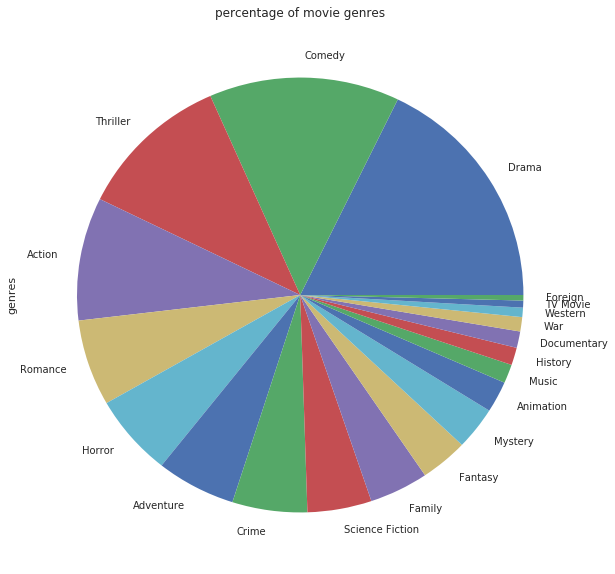

In [35]:
df_bygenres['genres'].value_counts().plot(kind='pie', figsize=(10,10))
plt.title('percentage of movie genres')

>So Drama, Comedy and Thriller is the most popular genres of movie, but is these genres alwsays been the most popular since 1960?
Line chart could be useful to describe the change of movie genres history

In [36]:
# Select 10 of the most genres
df_bygenres['genres'].value_counts().head(10)

Drama              3934
Comedy             3050
Thriller           2462
Action             2022
Romance            1415
Horror             1339
Adventure          1271
Crime              1200
Science Fiction    1028
Family              946
Name: genres, dtype: int64

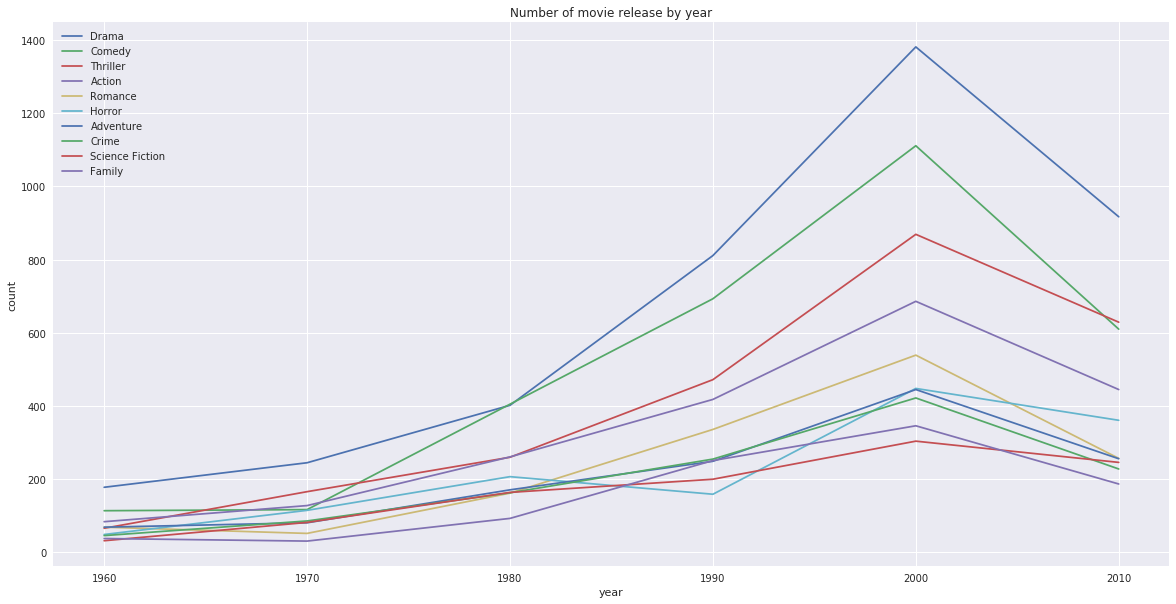

In [40]:
linelist =['Drama', 'Comedy','Thriller','Action','Romance','Horror','Adventure','Crime','Science Fiction','Family']
ind = df_bygenres['release_century'].value_counts().index.sort_values()
plt.figure(figsize = (20,10))
for line in linelist: # create loop 
    line_genres = 'genres_' + str(line)
    vars()[line_genres] = df_bygenres[df_bygenres['genres'] == line]
    plt.plot(vars()[line_genres]['release_century'].value_counts()[ind],label=line) # create line chart for each genres
plt.xlabel('year')
plt.ylabel('count')
plt.title('Number of movie release by year')
plt.legend()

> Drama and Comedy always been the most popular genres of peoples.

Then create a bar chart to check the Average revenue of each movie genres

Text(0.5,1,'Average revenue of each movie genres')

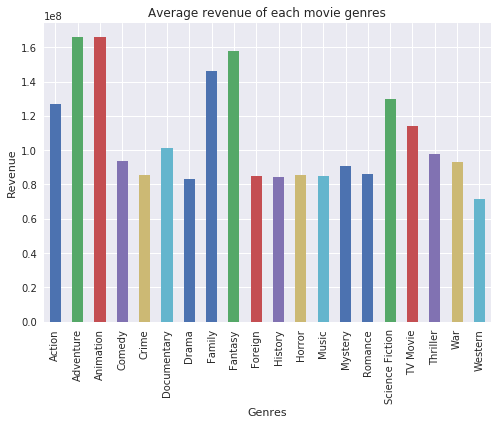

In [49]:
# Which genres got the most revenue
df_bygenres.groupby(['genres'],as_index=True)['revenue'].mean().plot(kind='bar')
plt.xlabel('Genres')
plt.ylabel('Revenue')
plt.title('Average revenue of each movie genres')

And this bar chart shown the Average revenue of each movie genres, Adventure and Animation got the most revenue

> So we can see, Drama is always been the most popular genres from the beginning. Comedy is the second popular since 1980. According to the line chart,record of century 2010 is lower than 2000, it is becasue the latest movie release year is up to 2016.

## Question 2: Can higher budget get higher popularity? 
> Now let's move our focus to relationship between budget, revenue and popularity. can higher budget get higher revenue or popularity? 

>Take a first look at a scatter matrix to see if any possible relation.

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f1457ba6080>,
      dtype=object)

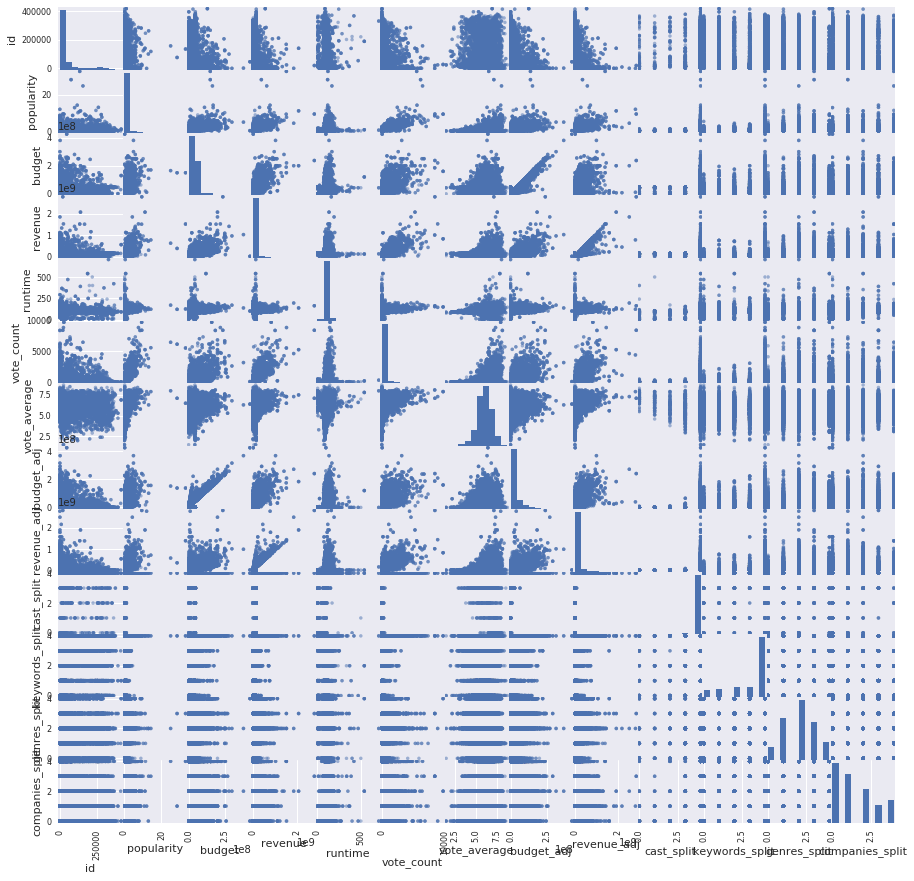

In [44]:
pd.plotting.scatter_matrix(df_bygenres, figsize=(15,15))

> Seems no strong relationship can be easily found. Let's take a look about the change of budget and revenge

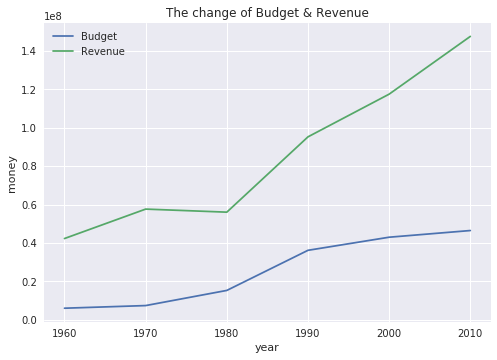

In [41]:
df_bygenres.groupby(['release_century'],as_index = True)['budget'].mean().plot(label='Budget') # create line
df_bygenres.groupby(['release_century'],as_index = True)['revenue'].mean().plot(label='Revenue')
plt.xlabel('year')
plt.ylabel('money')
plt.title('The change of Budget & Revenue')
plt.legend()

>Revenue is growth faster after 1990, budget is growth but not as fast as revenue.

>Scatter chart can describe each movie, can provide more detail view.

Text(0.5,1,'Relationship between budget & revenue for each movie')

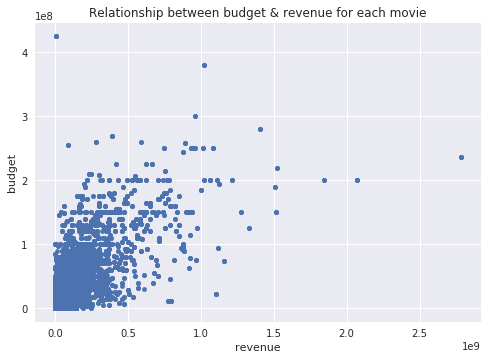

In [42]:
df_bygenres.plot(x='revenue', y='budget',kind='scatter')
plt.title('Relationship between budget & revenue for each movie')

>According to the scatter chart, budget is not so related to revenue.Let's look at popularity and budget to see if any strong relation ship.

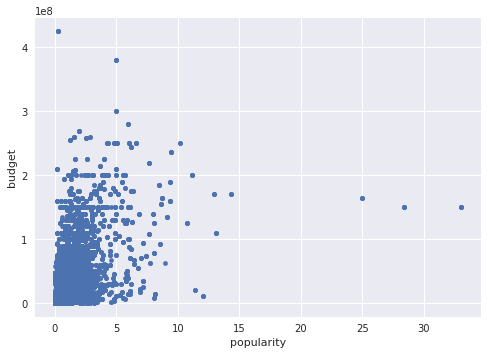

In [43]:
df_bygenres.plot(x='popularity', y='budget',kind='scatter')
plt.title('Relationship between budget & popularity for each movie')

>Since no strong relationship can be found. Budget doesn't matter with the revenue or popularity so much.

# Conclusions

I started this TMDB movie data analyst and focus to 2 main direction. The first direction is how is the genres change since 1960, and it shown that Drama and Comedy is the most popular genres of peoples. And the number of released movie is growth faster since 1980.


The second direcion I been thinking is can higher budget can truely affect the movie quality, and I think movie quality can be describe using revenue and popularity. In the exploratory data analyst, I don't see a strong relationship between budget, revenue and popularity. Also, the average revenue is growth rapidly since 1990, budget doesn't. Therefore, I believed movie quality doesn't matter by budget.


The most limitation of this data analyst is 5 columns contains multiple value in one row and split with '|'. Also, each row could store different numbers of values(from 0 to 4 count of values), took a long time to create a for loop to separate them.

During this data analyst project, I did some research from:
https://python-graph-gallery.com/line-chart/
https://matplotlib.org/index.html
https://stackoverflow.com/
